In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
iris = load_iris() # 아이리스 데이터 가져오기

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=12345) # 학습용, 테스트용 데이터 분리

In [37]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       0, 1, 0, 2, 0, 1, 0, 2])

In [38]:
dt = DecisionTreeClassifier(random_state=12345, max_depth=2) # 결정트리 만들기

In [39]:
dt.fit(X_train,y_train) # 학습

DecisionTreeClassifier(max_depth=2, random_state=12345)

In [40]:
y_pred = dt.predict(X_test) # 예측값을 저장

In [41]:
y_pred # X_test의 예측값인 y_pred = y_test인지 비교해보자.

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       0, 1, 0, 2, 0, 1, 0, 2])

In [42]:
metrics.accuracy_score(y_test, y_pred) # 테스트 데이터에 대한 예측값의 정확도 측정

0.9333333333333333

In [43]:
matrix = metrics.confusion_matrix(y_test, y_pred) # 혼동 행렬 : 대상 A를 제대로 예측한 경우와 그렇지 못한 경우가 얼마나 있는지 세어보는 것이다.
matrix

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  6]], dtype=int64)

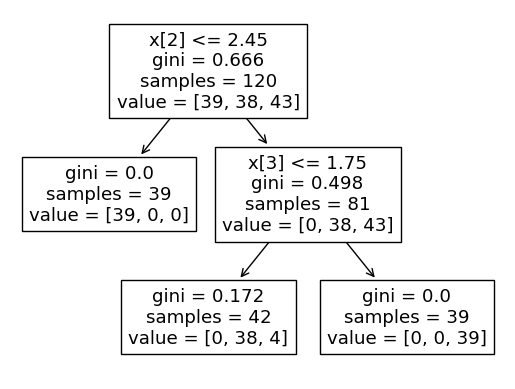

In [44]:
plot_tree(dt)
plt.show()

In [46]:
for name, value in zip(iris.feature_names, dt.feature_importances_): # zip() : 두 리스트를 묶어 줌
    print(f"{name} : {value:.3f}") # 특성 중요도 확인

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.544
petal width (cm) : 0.456


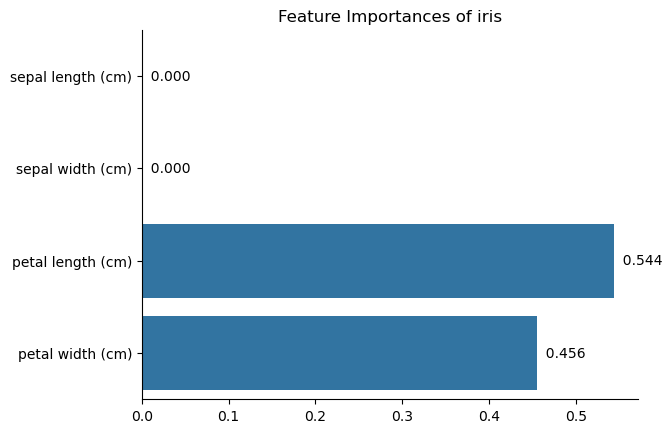

In [52]:
ax = sns.barplot(x=dt.feature_importances_, y=iris.feature_names)
ax.bar_label(ax.containers[0], fmt="  %.3f") # 막대그래프에 숫자 띄우기
plt.gca().spines[['right','top']].set_visible(False) # 오른쪽과 위 테두리 없앰
plt.title("Feature Importances of iris")
plt.show()

# 특성 중요도 : 각 특성이 예측에 얼마나 큰 영향을 미쳤는지를 알려주는 지표.